Credit Score - Classification model

1. Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading the Data

In [47]:
df = pd.read_csv("Desktop/creditcard.csv")
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11660,19915,1.294875,-0.645847,0.689549,-0.351634,-1.026884,-0.129811,-0.928101,0.114172,0.804717,...,-0.097462,-0.020893,0.040297,0.159282,0.350705,-0.278351,-0.010354,-0.008003,10.00,0.0
11661,19915,1.404683,-0.554883,0.612239,-0.234956,-1.190992,-0.816824,-0.775771,-0.142637,1.121638,...,-0.196110,-0.303562,0.005661,0.313352,0.473813,-0.276618,-0.024026,0.002106,5.00,0.0
11662,19915,-0.945541,0.479754,1.521916,-1.298658,-0.852548,-0.604029,-0.354686,0.498106,0.407159,...,-0.050745,0.056031,-0.055584,0.312195,0.026299,-0.413466,0.189152,0.086360,10.00,0.0
11663,19915,-0.087909,0.184093,1.683910,-0.837378,-0.682605,-0.669907,-0.056222,-0.120669,0.409636,...,-0.109428,-0.054760,-0.139329,0.333267,0.072695,-0.320292,0.006423,0.010148,10.00,0.0


In [48]:
columns_to_drop = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
                   'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

columns_existing = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_existing)


In [49]:
print(df.columns)  

Index(['Time', 'Amount', 'Class'], dtype='object')


In [50]:
df.isnull().values.any()

True

In [51]:
df.shape

(11665, 3)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665 entries, 0 to 11664
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11665 non-null  int64  
 1   Amount  11664 non-null  float64
 2   Class   11664 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 273.5 KB


In [53]:
df.describe()

,Time,Amount,Class
count,11665.000000,11664.000000,11664.000000
mean,7701.086069,62.795132,0.004201
std,5964.969525,179.816783,0.064681
min,0.000000,0.000000,0.000000
25%,2463.000000,5.000000,0.000000
50%,6308.000000,15.950000,0.000000
75%,11898.000000,50.000000,0.000000
max,19915.000000,7712.430000,1.000000


3. Data Clearing

In [54]:
df.isnull().sum()

Time      0
Amount    1
Class     1
dtype: int64

In [55]:
df = df.fillna(method = "ffill")
df = df.fillna(method = "bfill")
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [56]:
df.isnull().sum()


Time      0
Amount    0
Class     0
dtype: int64

In [57]:
df["Amount"].describe()

count    11665.000000
mean        62.790606
std        179.809739
min          0.000000
25%          5.000000
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

In [58]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  11616
Number of Fraud transactions:  49
Percentage of Fraud transactions: 0.4201


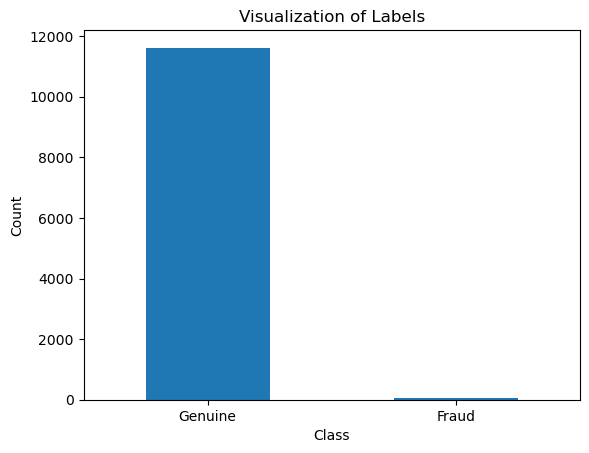

In [59]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

4. Normalization

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["NormalizedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
# df.drop(["Amount", "Time"], inplace= True, axis= 1)
y = df["Class"]
X = df.drop(["Class"], axis= 1)

5. Implment ML Algoritms

5.1 Logistic Regression

In [62]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 42)


In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score =(y_test,y_pred)
pd.DataFrame({"actual_value": y_test, "predicted_value":y_pred})



,actual_value,predicted_value
4012,0.0,0.0
1457,0.0,0.0
11431,0.0,0.0
6888,0.0,0.0
6333,0.0,0.0
...,...,...
1233,0.0,0.0
185,0.0,0.0
8369,0.0,0.0
7194,0.0,0.0


In [79]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9952850407201028


5.2 Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score (y_test,y_pred)
pd.DataFrame({"actual_value": y_test, "predicted_value":y_pred})

,actual_value,predicted_value
4012,0.0,0.0
1457,0.0,0.0
11431,0.0,0.0
6888,0.0,0.0
6333,0.0,0.0
...,...,...
1233,0.0,0.0
185,0.0,0.0
8369,0.0,0.0
7194,0.0,0.0


In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9935705100728676


5.2.1 Hyperparameter Tuning on Decision Tree 

In [88]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['log2','sqrt','auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 3, 5, 10, 50],
             'min_sample_split': [2, 3, 50, 100],
             'min_sample_leaf': [1, 5, 8, 10] 
             }

grid_obj = GridSearchCV(df, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
df = grid_obj.best_estimator_
dt.fit(X_train, y_train)
y_pred = dt.predict(x_test)




TypeError: estimator should be an estimator implementing 'fit' method,         Time  Amount  Class  NormalizedAmount
0          0  149.62    0.0          0.482917
1          0    2.69    0.0         -0.334260
2          1  378.66    0.0          1.756762
3          1  123.50    0.0          0.337646
4          2   69.99    0.0          0.040041
...      ...     ...    ...               ...
11660  19915   10.00    0.0         -0.293604
11661  19915    5.00    0.0         -0.321412
11662  19915   10.00    0.0         -0.293604
11663  19915   10.00    0.0         -0.293604
11664  19915   10.00    0.0         -0.293604

[11665 rows x 4 columns] was passed

In [87]:
acc_dt = round(accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy of Decition Tree model: ", acc_dt)

Accuracy of Decition Tree model:  99.36


5.3 Random Forest 

In [89]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score (y_test,y_pred)
pd.DataFrame({"actual_value": y_test, "predicted_value":y_pred})

,actual_value,predicted_value
4012,0.0,0.0
1457,0.0,0.0
11431,0.0,0.0
6888,0.0,0.0
6333,0.0,0.0
...,...,...
1233,0.0,0.0
185,0.0,0.0
8369,0.0,0.0
7194,0.0,0.0


In [90]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.994856408058294
